In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------machine learning python libraries-----------------

In [3]:
# The train_test_split function allows us to easily split the data
from sklearn.model_selection import train_test_split

In [4]:
# Using these classes to setup a grid search to find optimal model parameters
from sklearn.model_selection import KFold, GridSearchCV

In [6]:
 #StandardScalar and Normalizer are used to scale the data.
from sklearn.preprocessing import StandardScaler, Normalizer

In [7]:
# Using a support vector regression (SVR) to predict our properties
from sklearn.svm import SVR

In [8]:
# Obtaining simple metrics to monitor performance
from sklearn.metrics import r2_score, mean_squared_error

# ---------------custom python code-------------------------------------------

In [9]:
#import custom python code that is to complicated for this guide.
import composition
import utils

# ---------------clean the data-------------------------------------------

In [10]:
# We want to clean the aflow data that we downloaded from aflowlib.org.
# To do this, we will first read in the .csv file using pandas (pd)

# Read in the aflow data as a .csv file. (df stands for 'DataFrame')
df_aflow_elastic = pd.read_csv('aflow_data/aflow_elastic_data.csv')

In [11]:
# We can look individual columns of data using the format df['column_name']
# Here, I will save a variable named 'uncleaned_formulae'
uncleaned_formulae = df_aflow_elastic['ENTRY ']

# -----------------------------------------------------------------------------

In [12]:
# We use a "for loop" to iterate through each formula (value from excel cells).
# While looping, I will appemd 'clean' formulae into the "cleaned" list
cleaned_formulae = []

In [17]:
# Initialize an empty list to store cleaned formulas
cleaned_formulae = []

# Start the "for loop"
for cell_value in uncleaned_formulae:
    # Split the string into a list at " ["
    split_list = cell_value.split(" [")  
    # Get the first part of the split list (before "[")
    clean_formula = split_list[0].strip()  # Strip ensures no leading/trailing spaces
    # Append the cleaned formula to the list
    cleaned_formulae.append(clean_formula)

# Print to verify output
print(cleaned_formulae)


['Ag10S8Sb2', 'Ag1Al1S2', 'Ag1C2K1', 'Ag1C2Li1', 'Ag1In5Se8', 'Ag1In5Te8', 'Ag1P1Pd5', 'Ag1P1Pt5', 'Ag1Pt5Si1', 'Ag2Al2O4', 'Ag2Al2Se4', 'Ag2As2Ba2', 'Ag2As2Sr2', 'Ag2Au2F8', 'Ag2Ba2P2', 'Ag2Bi2Ca2', 'Ag2Bi2Ca2', 'Ag2Bi2K4', 'Ag2Bi2Yb2', 'Ag2Br4Cs2', 'Ag2Ca1Ge2', 'Ag2Co2O4', 'Ag2Dy2Pb2', 'Ag2Dy2Se4', 'Ag2Dy2Sn2', 'Ag2Dy2Te4', 'Ag2Er2S4', 'Ag2Er2Sn2', 'Ag2F6Rb2', 'Ag2Ga2O4', 'Ag2Ga2S4', 'Ag2Ga2Te4', 'Ag2Ge2La2', 'Ag2Hg1I4', 'Ag2Ho2Pb2', 'Ag2Ho2Sn2', 'Ag2In2O4', 'Ag2In2S4', 'Ag2La1Si2', 'Ag2La2Pb2', 'Ag2O4Sc2', 'Ag2O4Y2', 'Ag2P2Sr2', 'Ag2Pb2Tb2', 'Ag2S6Ta2', 'Ag2S6Ta2', 'Ag2Sb6Zr10', 'Ag2Si2Sr1', 'Ag2Si2Tb1', 'Ag2Si2Yb1', 'Ag2Sn2Tb2', 'Ag2Te4Y2', 'Ag3As3Ca3', 'Ag3Ca3P3', 'Ag3Dy3Ge3', 'Ag3Dy3Mg3', 'Ag3Dy3Si3', 'Ag3Er3Ge3', 'Ag3Er3Ge3', 'Ag3Er3Si3', 'Ag3Er3Sn3', 'Ag3Ge3Tb3', 'Ag3La3Mg3', 'Ag3Mg3Y3', 'Ag3Pb3Y3', 'Ag3Si3Y3', 'Ag4Al4O8', 'Ag4As4S4', 'Ag4Ca4Sb4', 'Ag4Dy4Se8', 'Ag4Er4Se8', 'Ag4F12K4', 'Ag4Ho4Se8', 'Ag4K4O4', 'Ag4O4Rb4', 'Ag4Se4Tl4', 'Ag4Te4Tl4', 'Ag5O6Pb2', 'Ag6P2S8', 'Ag8Ba4Te

In [18]:
# Lets now make a new dataframe to hold our clean data.
df_cleaned = pd.DataFrame()

In [19]:
# We can now add a column with the cleaned formulae, df['column name'] = values
df_cleaned['formula'] = cleaned_formulae

In [20]:
# We can also add a column with the target property we want to predict
df_cleaned['bulk_modulus'] = df_aflow_elastic['AEL VRH bulk modulus ']


# =============================================================================
#                              Evaluate the data

In [ ]:
# We now want to make sure that everthing looks okay with our data.

# ----------------------------------
# Handle duplicate formula instances
# ----------------------------------
# As a first step, we can check for duplicates. Because this data is ordered in
# a well though manner, we can get away looking for matching strings.
# For chemical formula, it is probably better to check for duplicates on a 
# chemical basis (ie. do the fractional compositions match, Al2O3 = Al4O6)

In [21]:
# We can use "Series.value_counts()" on the formula column to see if a string
# value appears more than once.
check_for_duplicates = df_cleaned['formula'].value_counts()

In [22]:
# if we open this up, we see that there are duplicate values. 
# We can remove duplicates by taking a mean. Because we are working fast here,
# we can just drop duplicates after the first instance. (Notice, the "inplace"
# argument allows use to make this change to the dataframe directly.)
df_cleaned.drop_duplicates('formula', keep='first', inplace=True)

In [ ]:
# -------------------------------------
# Check the property for anything "odd"
# -------------------------------------
# We can now look at the property to see if there is anything unexpected.
# Some things we might want to look out for: "should there be negative values?"
# "How high does this property get?" "What do I expect the average to be?" etc.

[]

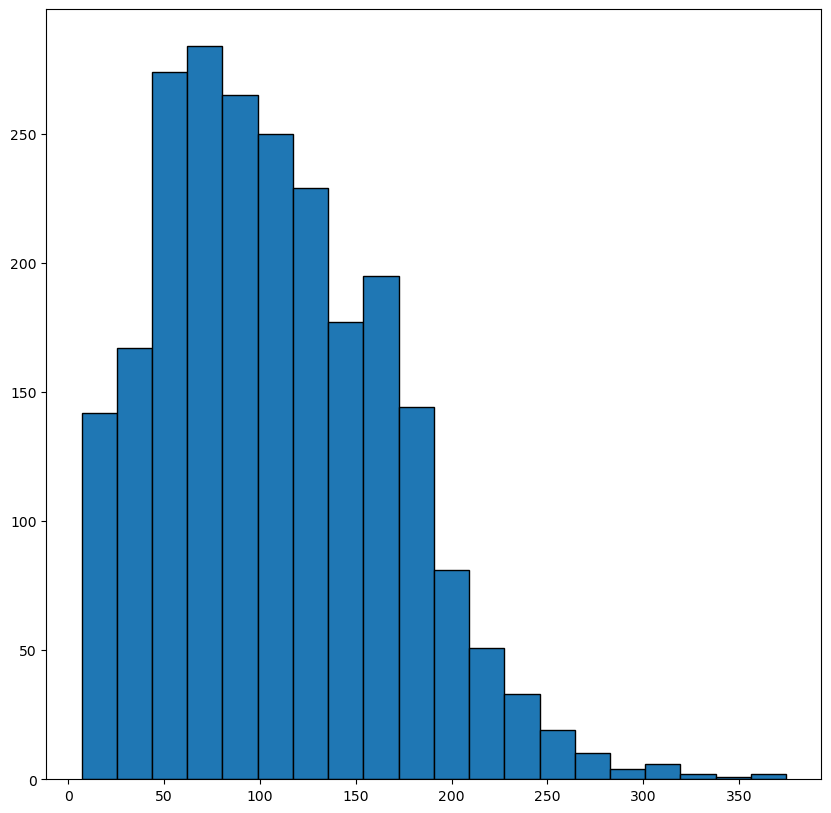

In [23]:
# We can quickly look at the values with a histrogram plot.
plt.figure(1, figsize=(10, 10))
df_cleaned['bulk_modulus'].hist(bins=20, grid=False, edgecolor='black')
plt.plot()

In [ ]:
# -----------------------------------------
# Consider tagging distinct chemical groups
# -----------------------------------------
# A lot of materials data is more 'structured' than this. We can often expect
# to find materials of the same type. A more detailed evaluation would probably
# tag those materials, and be cleaver when making the training and test data.
# We are going to ignore this step for simlicity.

# ---------------------------------------------------------------------
# Consider whether you want to use auxilary properties in your learning
# ---------------------------------------------------------------------
# If we are interested in prediction the bulk modulus for any arbitrary formula
# we will want to make sure that our features can be completely derived from
# the chemical composition. If we are interested in a more focused task, such
# as screening the PCD for superhard materials* than we can considered
# using additional info. Descriptions of the strucutre are a good addition.
#      *Brgoch group (https://pubs.acs.org/doi/abs/10.1021/jacs.8b02717)

# =============================================================================
#                             Featurize the data

In [ ]:
# We can now look at making the chemical formula "machine readable".
# We want to be able to give the compute a vector that describes the formula
# in a meaninful way. 

# The simplest version of this is a vector were each component represents a
# different formula, ie. (Ag, Al, ..., O, ..., Zr). Each formula (take alumina)
# can now be easily encoded.  Al2O3 ==> (0, 2, ..., 3, ..., 0)
# We can usually do better however. Instead of using just the elements, we can
# make a feature from a combination of atomic & elemental properties
# to make a composition-based feature vector (CBFV).

# I have supplied code (composition.py) that does this for us automatically. 
# If we a pandas.DataFrame with a 'formula' and 'target' column, the function 
# will return the features for each instance of data (X), the target values (y)
# and the formula associated with those (formulae).

In [24]:
# Lets rename our columns to match the required input
df_cleaned.columns = ['formula', 'target']


In [26]:
# Lets convert our chemical formula into features here
X, y, formulae = composition.generate_features(df_cleaned)

The element: Pu from formula C8Pu4W4 is not currently supported in our database


In [27]:
X, y, formulae

(      avg_Atomic_Number  avg_Atomic_Weight  avg_Period  avg_group  \
 0             35.000000          78.936500    4.200000  13.400000   
 1             23.000000          49.745435    3.500000  14.000000   
 2             19.500000          42.747125    3.250000  10.000000   
 3             15.500000          34.707800    2.750000  10.000000   
 4             40.285714          93.831300    4.428571  14.571429   
 ...                 ...                ...         ...        ...   
 2330          59.000000         145.684575    5.250000  15.000000   
 2331          66.250000         164.880400    5.500000  14.250000   
 2332          42.250000          97.928962    4.750000  10.750000   
 2333          39.666667          91.001950    4.666667   9.666667   
 2334          36.692308          85.139604    4.538462   9.000000   
 
       avg_families  avg_Metal  avg_Nonmetal  avg_Metalliod  \
 0         5.400000   0.500000      0.500000            0.0   
 1         5.750000   0.500000  

# =============================================================================
#                           Make a train-test split

In [ ]:
# Now that we have a "machine_readable" input, we want to partition our data
# into a train and test split. The training set will be used to train and 
# optimize our model. The test set will be reserved till the end to ensure our
# model is capable of accurate predictions beyond the data used for training.

# lets perform this step using sklearn function "train_test_split". 
# We simple give it the fraction of data we want in the test set. We can also
# give it a 'random seed' so we can recreate the same split everytime.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)


# =============================================================================
#                          Consider Scaling the data

In [29]:
# We can use StandardScalar to scale each feature to a mean=0 and variance=1.
# We then normalize the vector for each instance of data. This is done for
# numerical purposes (allows us to use gradient-descent-based algorithms).

# FOR STANDARD SCALAR:
# "Fit the training data" (calculate the mean & variance of the training data)
# "Transform" (subtract mean & divide by variance from each instance of data)

# FOR NORMALIZER:
# "Fit" (does nothing, but is kept for workflow purposes)
# "Transform" (scales the vector, for each instance of data, to unit norm)

In [30]:
scalar = StandardScaler()
normalizer = Normalizer()

In [31]:
# Do the scaling step
X_train_scaled = scalar.fit_transform(X_train)  # get statistics & transform
X_test_scaled = scalar.transform(X_test)  # trandform using 'training' stats.

In [32]:
# Do the normalizing step
X_train_scaled = normalizer.fit_transform(X_train_scaled)  # normalize vectors
X_test_scaled = normalizer.transform(X_test_scaled)  # normalize vectors

In [33]:
# Algorithms that generally need scaling: Linear, Ridge, & Lasso regressions,
# Support Vector Machines, Neural Networks, Logistic regression

# Algorithms that DO NOT need scaling: Decision Tree, Random Forest,
# Gradient Tree Boosting, etc. (usually decision tree based algorithms)

# =============================================================================
#                          Select desired algorithm

In [34]:
# We can consult the literature and see that most non-linear algorithm do a
# good job of predicting materials properties from the composition. Let's
# follow the Brgoch group and use a support vector regression. 

In [35]:
# here we can define the algorithm we want to use to model the data
model = SVR()

# =============================================================================
#                          Optimize Parameters

In [37]:
# We are using a SVR to model the data. We can change the parameters we use in
# the modeling to get better or worse models. These parameters generally
# dictate the amount of 'regularization' we apply to the model. Regularization 
# is our metaphorical dial for adjusting model complexity. Using a small amount
# of regularization may lead to a model that is too complex, grossly overfiting
# on the training data. Using too much regularization makes our model "simple"
# incapable of learning anything useful. We want to balance this by searching
# over a large range of possible parameter values. For simplicity we will use 
# a grid search.

# We first start by defining a cross-validation scheme. In this case we can use

In [38]:
# 5-fold cross-validation on shuffled data.
cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [39]:
# We now define the parameter space we want to search over. In the past I have
# found C=10 and gamma=1 to be generally effective values. Center our parameter
# search around these values. Note, it is good practice to have your search
# span several orders of magnitude. We will set our parameters accordingly.
c_parameters = np.logspace(-1, 3, 5)
gamma_parameters = np.logspace(-2, 2, 5)

In [40]:
# save the search space as a dictionary
parameter_candidates = {'C': c_parameters,
                        'gamma': gamma_parameters}

In [41]:
# with this line, we will define the full grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=parameter_candidates,
                    cv=cv)

In [42]:
# Here we start running the grid search. 
# The grid object will contain the optimal parameters when our search is done.
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVR(),
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [43]:

# Here we save the best parameters
best_parameters = grid.best_params_
print(best_parameters)

{'C': 100.0, 'gamma': 1.0}


[]

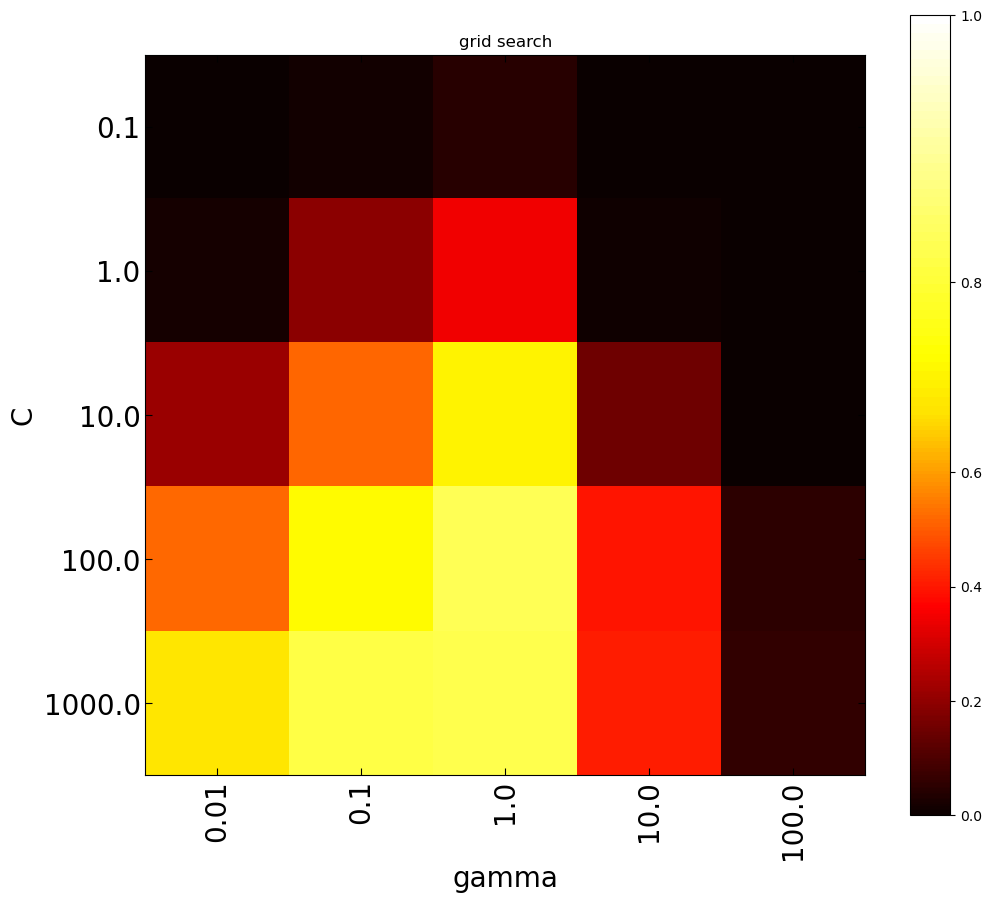

In [46]:
# Here we visualize model performance for different model parameters
utils.plot_2d_grid_search(grid, midpoint=0.7, vmin=-0, vmax=1)
plt.plot()

# =============================================================================
#                     Check performance on the test set
# 

In [47]:
# We can now use these optimal parameters to fit a model to all the training
# data. This model can then be applied to the test data to see how well we did.

In [48]:
# make our final model using the "best_parameters" dictionary as our arguments.
final_model = SVR(**best_parameters)

In [49]:
# fit the model to the training data
final_model.fit(X_train_scaled, y_train)

SVR(C=100.0, gamma=1.0)

In [50]:
# predict on the test data
y_test_predicted = final_model.predict(X_test_scaled)

r2 score: 0.919, rmse: 17.09


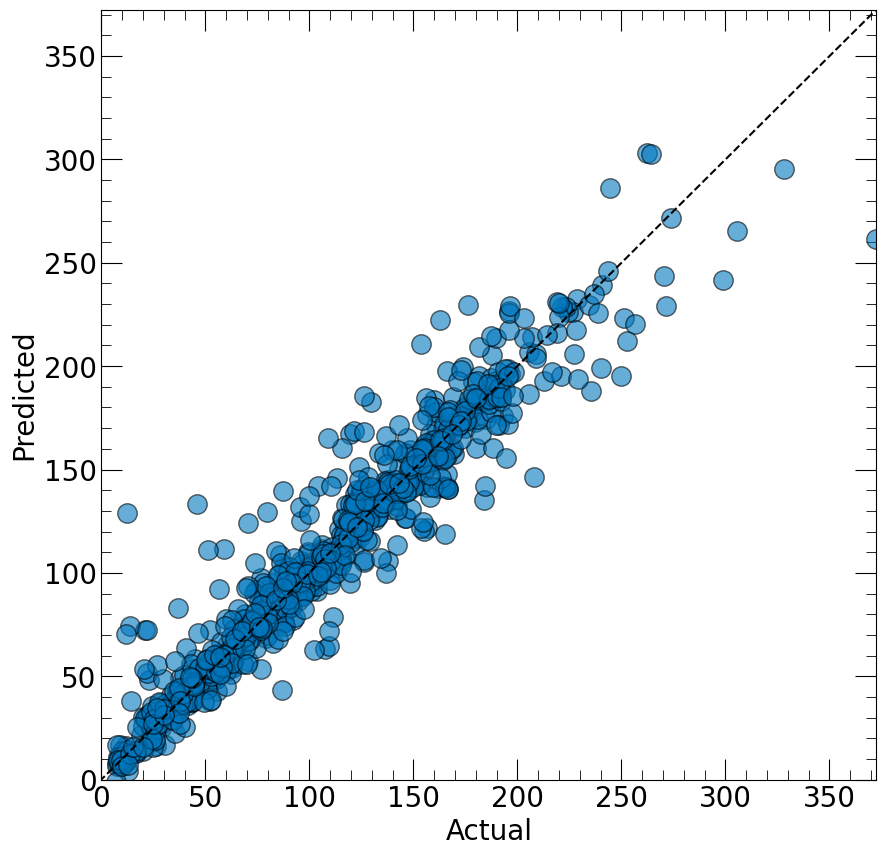

In [51]:
# plot the results to see how we did
utils.plot_act_vs_pred(y_test, y_test_predicted)
score = r2_score(y_test, y_test_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))

print('r2 score: {:0.3f}, rmse: {:0.2f}'.format(score, rmse))

# =============================================================================
#                     Make predictions on new compounds

In [52]:
# If we want to make predictions for a new compounds, we will first need to
# vectorize the composition. We will then need to scale it by the training data
# and finally, we will need to make predictions from the trained model.

In [53]:
class MaterialsModel():
    def __init__(self, trained_model, scalar, normalizer):
        self.model = trained_model
        self.scalar = scalar
        self.normalizer = normalizer

    def predict(self, formula):
        '''
        Parameters
        ----------
        formula: str or list of strings
            input chemical formula or list of formulae you want predictions for
    
        Return
        ----------
        prediction: pd.DataFrame()
            predicted values generated from the given data
        '''
        # Store our formula in a dataframe. Give dummy 'taget value'.
        # (we will use composition.generate_features() to get the features)
        if type(formula) is str:
            df_formula = pd.DataFrame()
            df_formula['formula'] = [formula]
            df_formula['target'] = [0]
        if type(formula) is list:
            df_formula = pd.DataFrame()
            df_formula['formula'] = formula
            df_formula['target'] = np.zeros(len(formula))
        # here we get the features associated with the formula
        X, y, formula = composition.generate_features(df_formula)
        # here we scale the data (acording to the training set statistics)
        X_scaled = self.scalar.transform(X)
        X_scaled = self.normalizer.transform(X_scaled)
        y_predicted = self.model.predict(X_scaled)
        # save our predictions to a dataframe
        prediction = pd.DataFrame(formula)
        prediction['predicted value'] = y_predicted
        return prediction

In [54]:
# initialize an object to hold our bulk modulus model
bulk_modulus_model = MaterialsModel(final_model, scalar, normalizer)

In [55]:
# lets define some formulae we are interested in
formulae_to_predict = ['NaCl', 'Pu2O4', 'NaNO3']
formula = 'NaCl'
